In [ ]:
# Restart runtime
# From the Runtime menu, select Restart runtime

# Uninstall current NumPy version
!pip uninstall -y numpy

# Install compatible NumPy version
!pip install numpy==1.23.0

# Upgrade or downgrade TensorBoard (if necessary)
!pip install --upgrade tensorboard

# Install necessary build tools and dependencies
!apt-get update
!apt-get install -y swig

!pip uninstall -y tensorboard numpy
!pip install numpy==1.22.4
!pip install tensorboard==2.8.0

# Install specific version of box2d-py
!pip install box2d-py==2.3.5

# Install other dependencies
!pip install gymnasium==0.29.1
!pip install stable-baselines3==2.4.0a1
!pip install ccxt==3.1.60
!pip install jqdatasdk==1.9.4
!pip install alpaca-trade-api==3.2.0
!pip install exchange-calendars==4.5.4
!pip install pyfolio==0.9.2
!pip install pyportfolioopt==1.5.5
!pip install ray[default,tune]==2.22.0
!pip install stockstats==0.5.4
!pip install wrds==3.2.0

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 19.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.0 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.0 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.0 which is incompatible.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.16.2 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 47.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.

In [ ]:
## install finrl library
%pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import datetime

from finrl import config
from finrl import config_tickers
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
from finrl.meta.data_processor import DataProcessor
from finrl.meta.data_processors.processor_yahoofinance import YahooFinanceProcessor
import sys
sys.path.append("../FinRL-Library")
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-j9cphgr6
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-j9cphgr6
  Resolved https://github.com/AI4Finance-LLC/FinRL-Library.git to commit fdc159816a82a7f95db24371c83130629fbf3847
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-t5y5xsgl/elegantrl_9e7f55af7a32437a93cf69ca2945fdf1
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-t5y5xsgl/elegantrl_9e7f55af7a32437a93cf69ca2945fdf1
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 5ef11a573caeb79d1498119777dfd36bf155e14b
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)


In [ ]:
dp = YahooFinanceProcessor()
df = YahooDownloader(start_date = '2008-01-01',end_date = '2021-10-31',ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (101615, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Basic Statistics:
                                  date           open           high  \
count                          101615  101615.000000  101615.000000   
unique                            NaN            NaN            NaN   
top                               NaN            NaN            NaN   
freq                              NaN            NaN            NaN   
mean    2014-12-15 14:54:10.220931584      86.954508      87.774699   
min               2008-01-02 00:00:00       2.835357       2.928571   
25%               2011-06-24 00:00:00      39.489285      39.939999   
50%               2014-12-17 00:00:00      67.500000      68.120003   
75%               2018-06-12 00:00:00     119.809998     120.845650   
max               2021-10-29 00:00:00     454.640015     461.390015   
std                               NaN      64.139805      64.734890   

                  low          close        volume     tic            day  \
count   101615.000000  101615.000000  1.016150e+05 

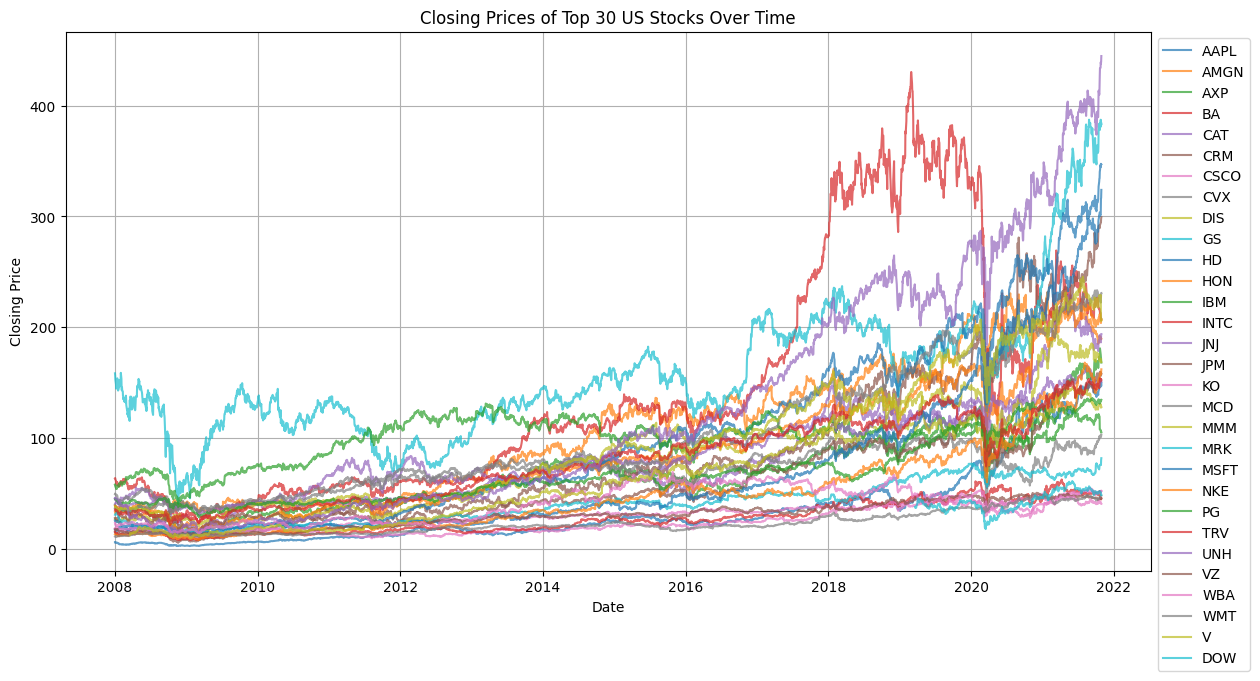

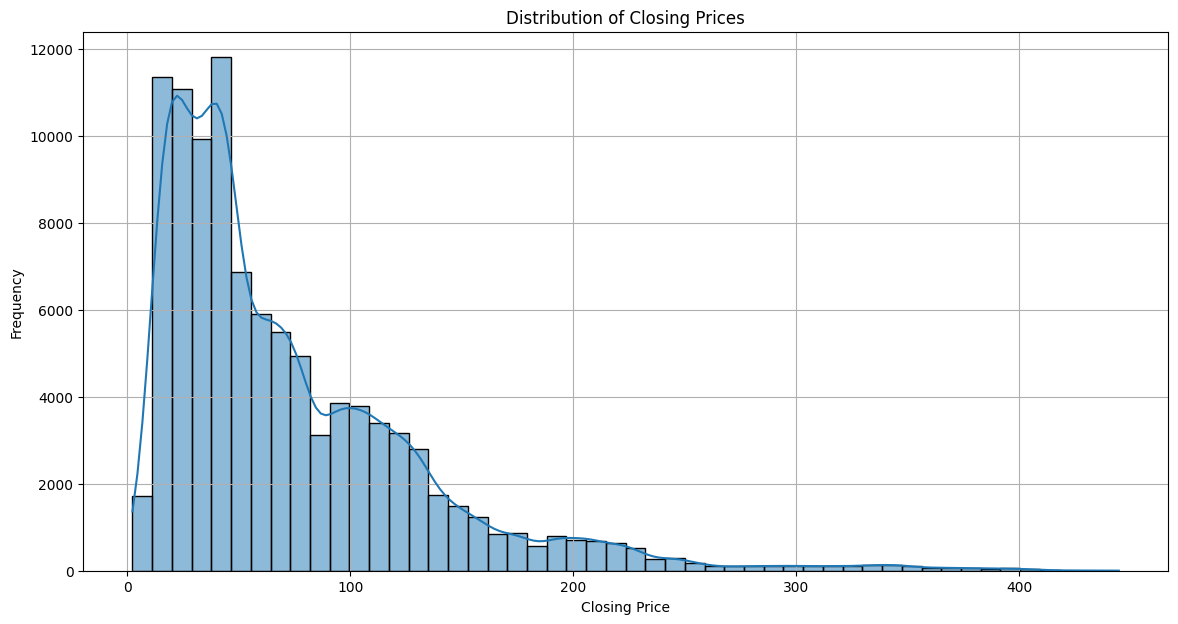

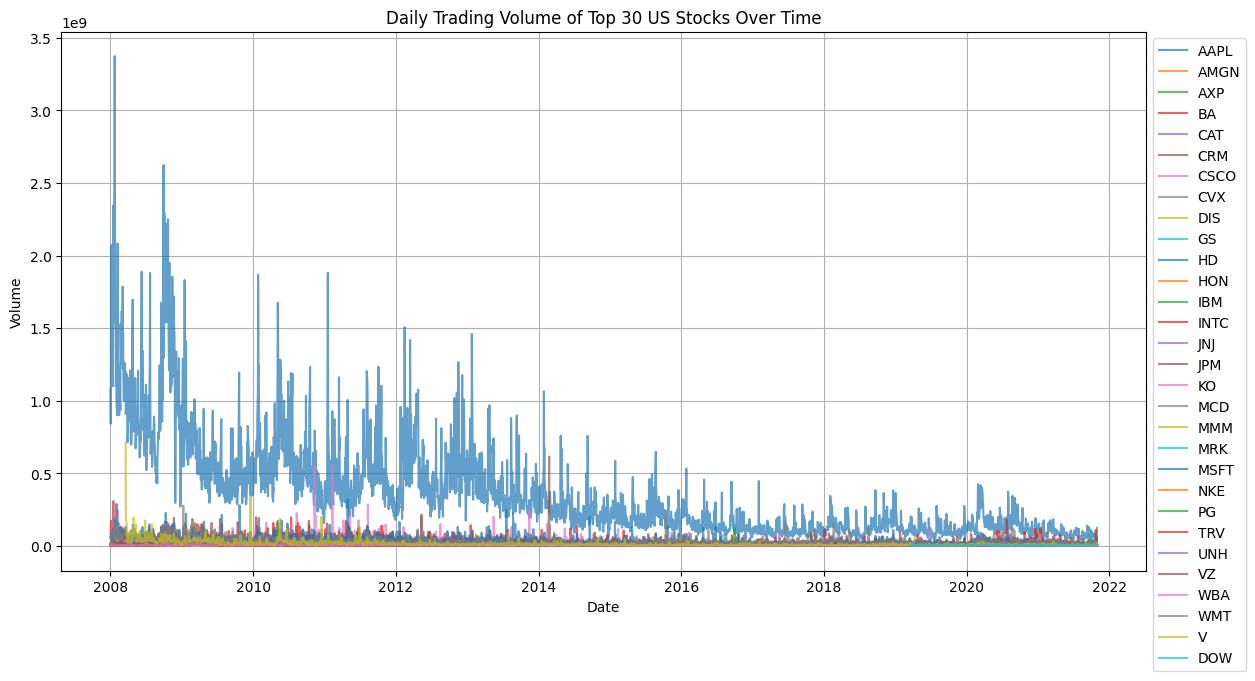

Daily Return Statistics:
 count    101585.000000
mean          0.000635
std           0.018618
min          -0.238484
25%          -0.007059
50%           0.000603
75%           0.008435
max           0.347550
Name: daily_return, dtype: float64


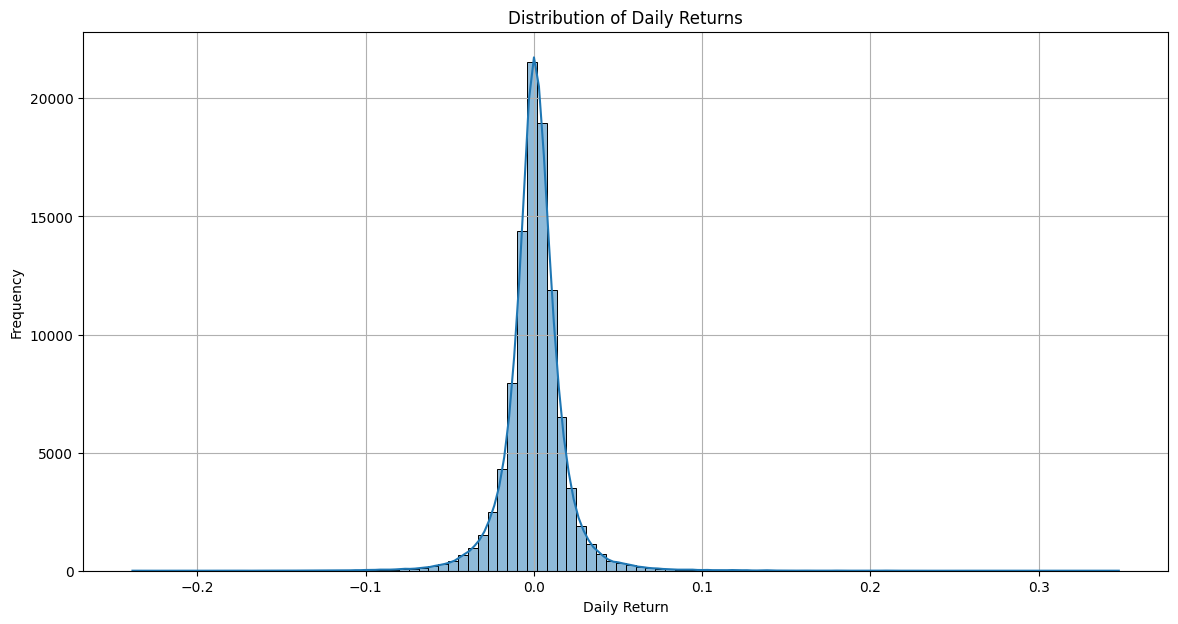

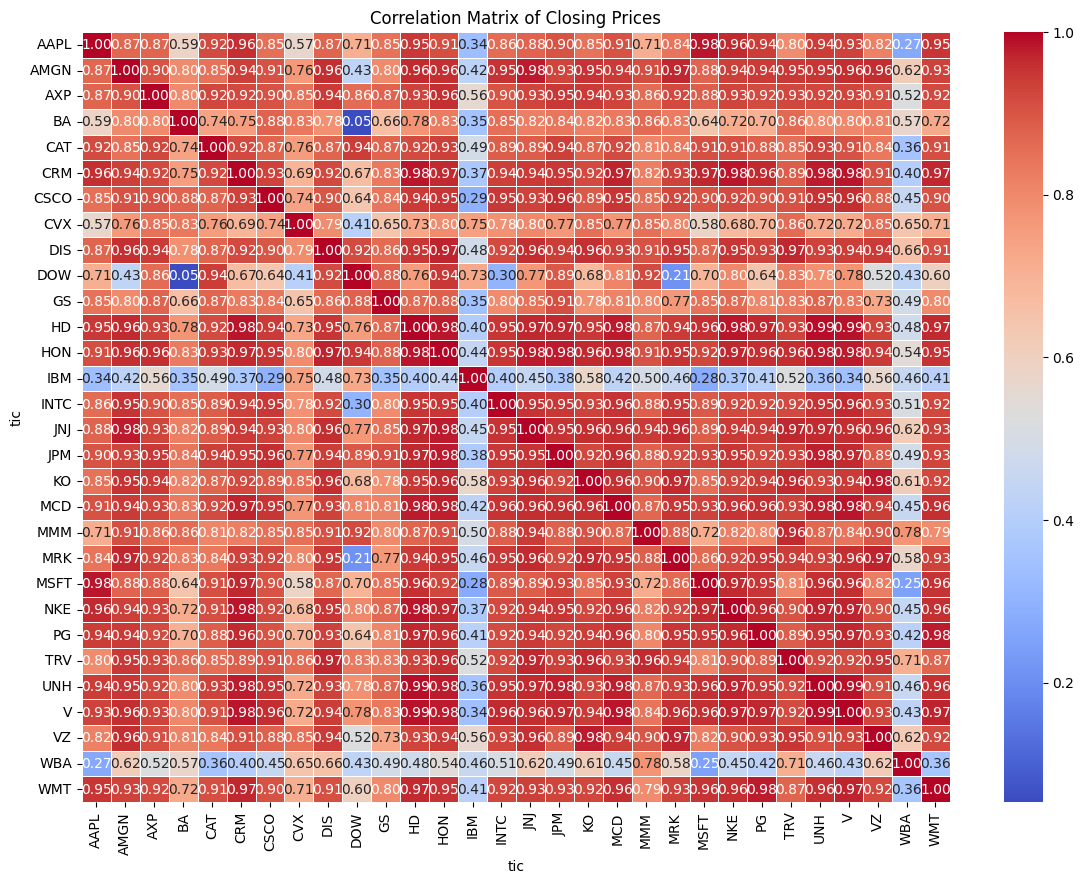

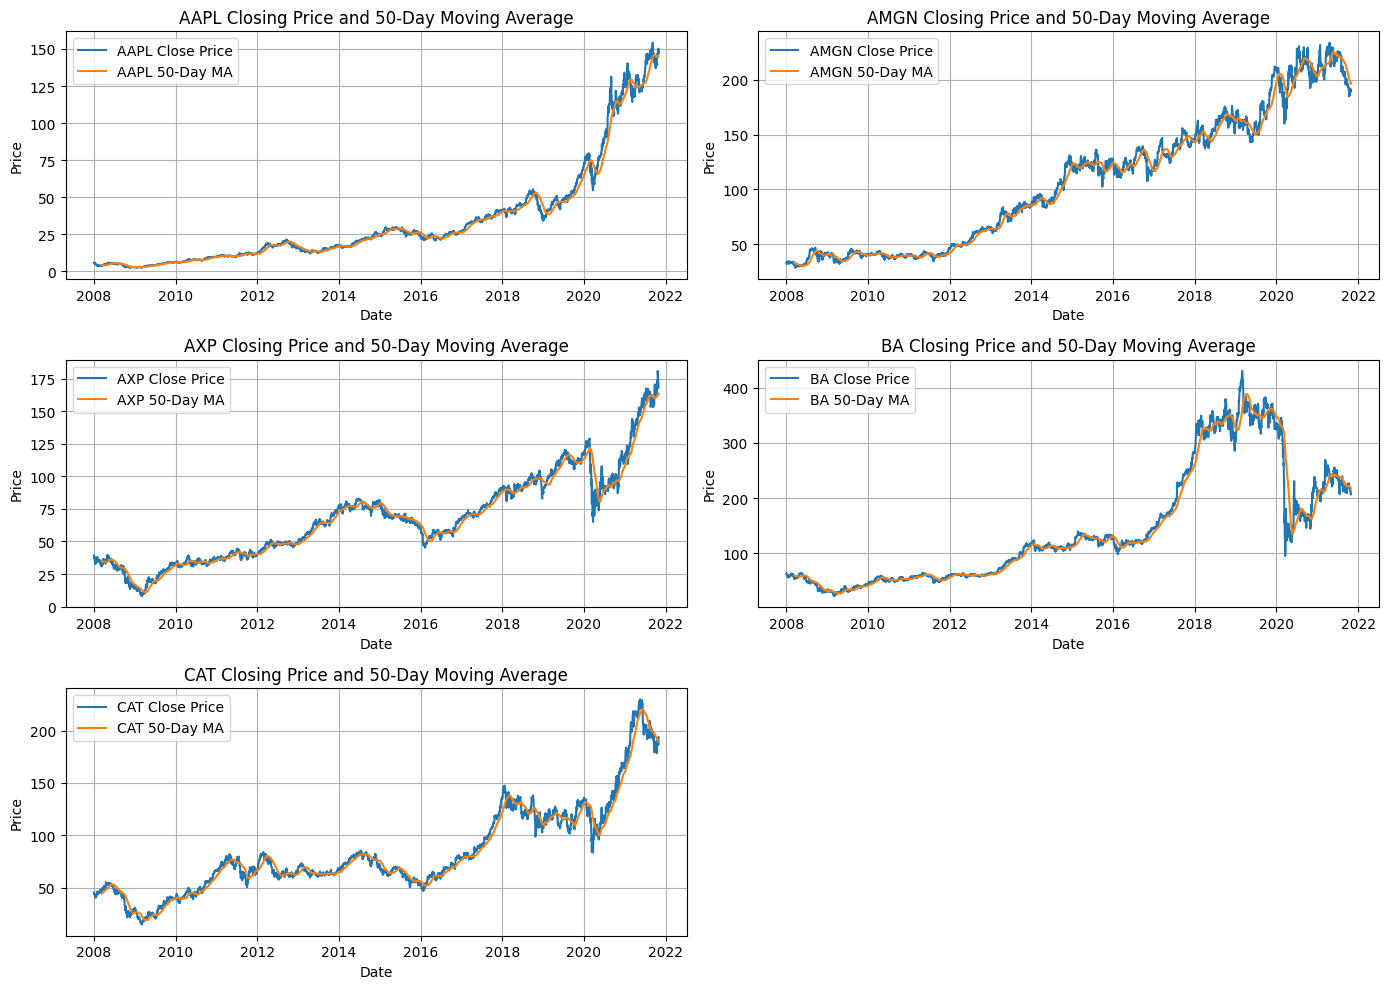

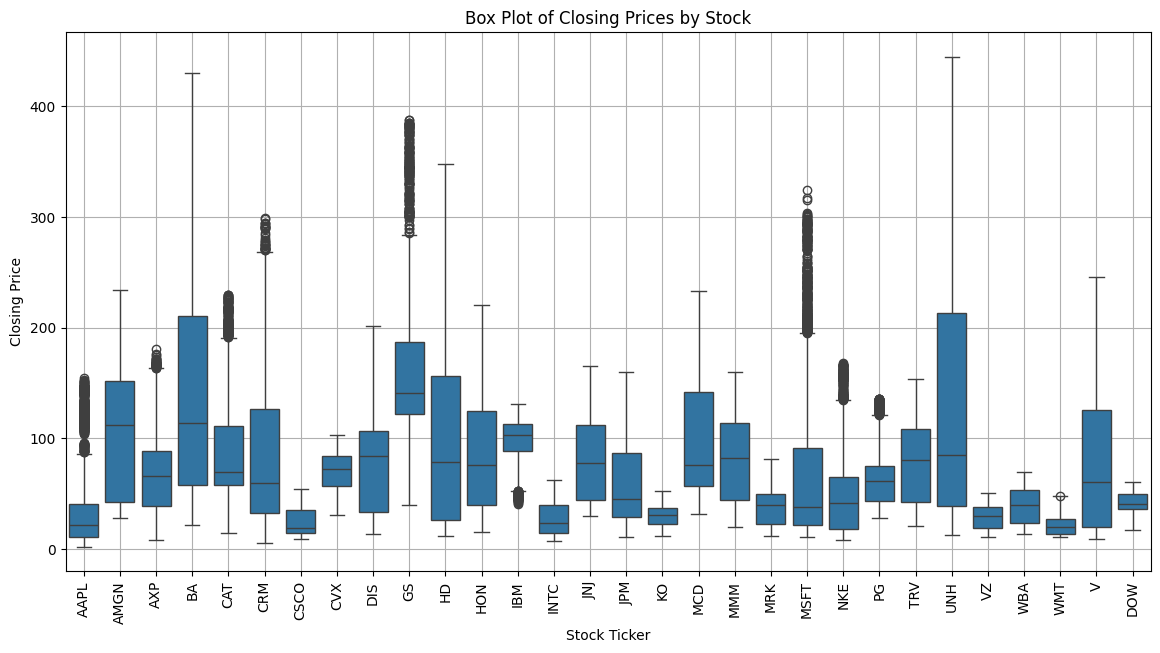

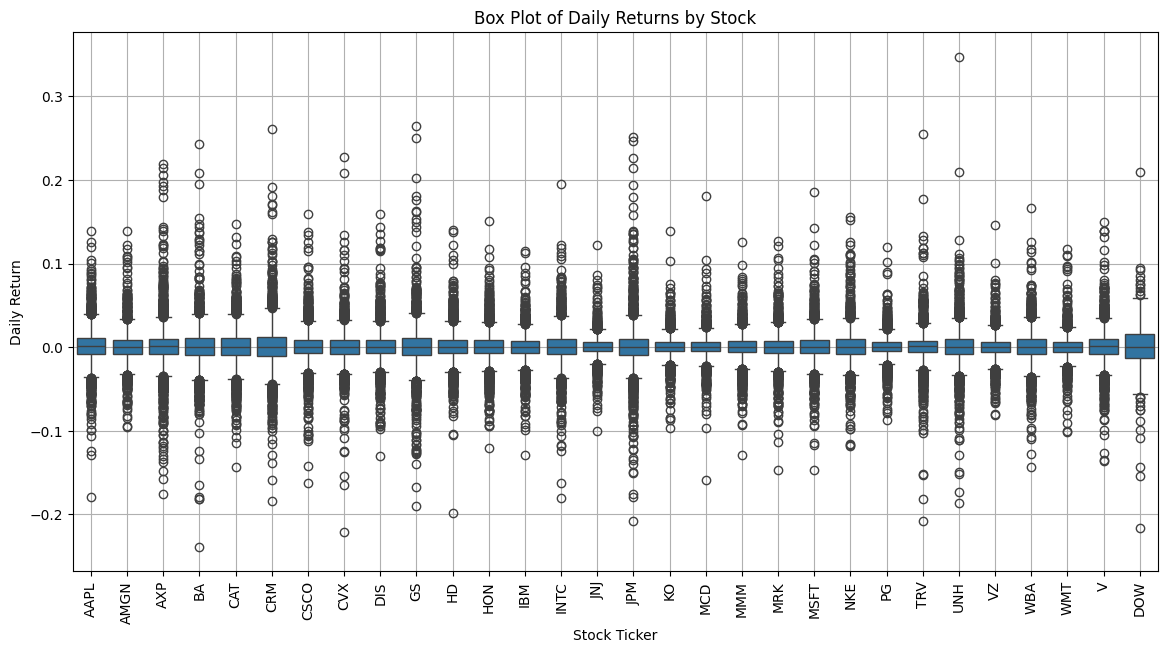

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed in the notebook (if running in a Jupyter environment)
%matplotlib inline

# Extract the unique stock tickers
#tickers = stocks_data['tic'].unique()

# Convert the 'date' column to datetime format
stocks_data['date'] = pd.to_datetime(stocks_data['date'])

# Display basic statistics of the dataset
basic_stats = stocks_data.describe(include='all')
print("Basic Statistics:\n", basic_stats)

# Plot the closing prices over time for all stocks
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stocks_data[stocks_data['tic'] == ticker]['date'],
             stocks_data[stocks_data['tic'] == ticker]['close'],
             label=ticker, alpha=0.7)
plt.title('Closing Prices of Top 30 US Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('closing_prices_over_time.png')
plt.show()

# Plot the distribution of closing prices
plt.figure(figsize=(14, 7))
sns.histplot(stocks_data['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('distribution_closing_prices.png')
plt.show()

# Plot the daily trading volume over time for all stocks
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stocks_data[stocks_data['tic'] == ticker]['date'],
             stocks_data[stocks_data['tic'] == ticker]['volume'],
             label=ticker, alpha=0.7)
plt.title('Daily Trading Volume of Top 30 US Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig('daily_trading_volume_over_time.png')
plt.show()

# Calculating the daily returns for each stock
stocks_data['daily_return'] = stocks_data.groupby('tic')['close'].pct_change()

# Summary statistics of daily returns
daily_return_stats = stocks_data['daily_return'].describe()
print("Daily Return Statistics:\n", daily_return_stats)

# Plotting the daily return distribution
plt.figure(figsize=(14, 7))
sns.histplot(stocks_data['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('distribution_daily_returns.png')
plt.show()

# Calculating the correlation matrix for closing prices of different stocks
closing_prices = stocks_data.pivot(index='date', columns='tic', values='close')

# Correlation matrix
corr_matrix = closing_prices.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Closing Prices')
plt.savefig('correlation_matrix_closing_prices.png')
plt.show()

# Calculating the moving average for a 50-day window
stocks_data['50_day_ma'] = stocks_data.groupby('tic')['close'].transform(lambda x: x.rolling(window=50).mean())

# Plotting the closing price and 50-day moving average for a few selected stocks
selected_tickers = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT']

plt.figure(figsize=(14, 10))
for i, ticker in enumerate(selected_tickers, 1):
    plt.subplot(3, 2, i)
    stock_data = stocks_data[stocks_data['tic'] == ticker]
    plt.plot(stock_data['date'], stock_data['close'], label=f'{ticker} Close Price')
    plt.plot(stock_data['date'], stock_data['50_day_ma'], label=f'{ticker} 50-Day MA')
    plt.title(f'{ticker} Closing Price and 50-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig('closing_price_and_50_day_ma.png')
plt.show()

# Box plots for closing prices of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(x='tic', y='close', data=stocks_data)
plt.title('Box Plot of Closing Prices by Stock')
plt.xlabel('Stock Ticker')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('box_plot_closing_prices.png')
plt.show()

# Box plots for daily returns of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(x='tic', y='daily_return', data=stocks_data)
plt.title('Box Plot of Daily Returns by Stock')
plt.xlabel('Stock Ticker')
plt.ylabel('Daily Return')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('box_plot_daily_returns.png')
plt.show()


# New section

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)
df.shape
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators


date       open       high        low      close      volume  \
0     2008-01-02   7.116786   7.152143   6.876786   5.883142  1079178800   
3483  2008-01-02  46.599998  47.040001  46.259998  33.263275     7934400   
6966  2008-01-02  52.090000  52.320000  50.790001  39.338627     8053700   
10449 2008-01-02  87.570000  87.839996  86.000000  63.481632     4303000   
13932 2008-01-02  72.559998  72.669998  70.050003  45.230278     6337800   

        tic  day  daily_return  50_day_ma  macd   boll_ub   boll_lb  rsi_30  \
0      AAPL    2      0.000462   4.218827   0.0  5.888345  5.880658   100.0   
3483   AMGN    2      0.000462   4.218827   0.0  5.888345  5.880658   100.0   
6966    AXP    2      0.000462   4.218827   0.0  5.888345  5.880658   100.0   
10449    BA    2      0.000462   4.218827   0.0  5.888345  5.880658   100.0   
13932   CAT    2      0.000462   4.218827   0.0  5.888345  5.880658   100.0   

          cci_30  dx_30  close_30_sma  close_60_sma  
0     -66.666667  100.0      5.883142      5.883142  
3483  -66.666667  100.0     33.263275     33.263275  
6966  -66.666667  100.0     39.338627     39.338627  
10449 -66.666667  100.0     63.481632     63.481632  
13932 -66.666667  100.0     45.230278     45.230278

In [ ]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  return_list.append(return_lookback)

  covs = return_lookback.cov().values
  cov_list.append(covs)


df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(90468, 20)

In [ ]:
dp = YahooFinanceProcessor()
df_org = YahooDownloader(start_date = '2008-01-01',end_date = '2021-10-31',ticker_list = DOW_30_TICKER).fetch_data()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************10

Shape of DataFrame:  (101615, 8)


Mounted at /content/drive


# Warsaw stocks market EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Read the DataFrame from the CSV file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data.csv')
df['date'] = pd.to_datetime(df['date'])

# Verify the DataFrame
print(df.head())


Mounted at /content/drive
        date        open        high        low      close  volume     tic  \
0 2008-01-02  100.000000  100.000000  97.000000  40.910793  163727  BHW.WA   
1 2008-01-02   85.849998   85.849998  81.050003  80.837440       0  BOS.WA   
2 2008-01-02    3.932531    4.030355   3.903183   3.019238   93709  BRS.WA   
3 2008-01-02   45.099998   45.599998  45.000000  37.896564   37462  CCC.WA   
4 2008-01-02    2.960000    3.090000   2.960000   2.855406   43646  CDR.WA   

   day  
0    2  
1    2  
2    2  
3    2  
4    2  


In [ ]:
df.head()

date        open        high        low      close  volume     tic  \
0 2008-01-02  100.000000  100.000000  97.000000  40.910793  163727  BHW.WA   
1 2008-01-02   85.849998   85.849998  81.050003  80.837440       0  BOS.WA   
2 2008-01-02    3.932531    4.030355   3.903183   3.019238   93709  BRS.WA   
3 2008-01-02   45.099998   45.599998  45.000000  37.896564   37462  CCC.WA   
4 2008-01-02    2.960000    3.090000   2.960000   2.855406   43646  CDR.WA   

   day  
0    2  
1    2  
2    2  
3    2  
4    2

<ipython-input-8-7d779f61de75>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_warsaw['date'] = pd.to_datetime(stocks_data_warsaw['date'])


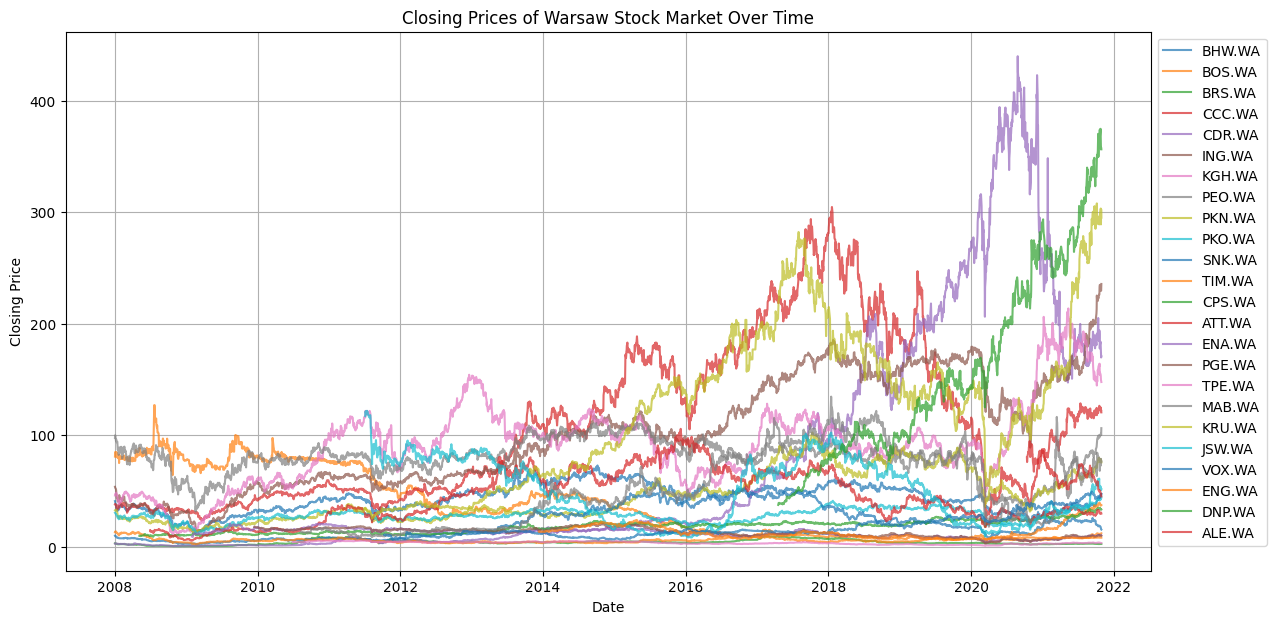

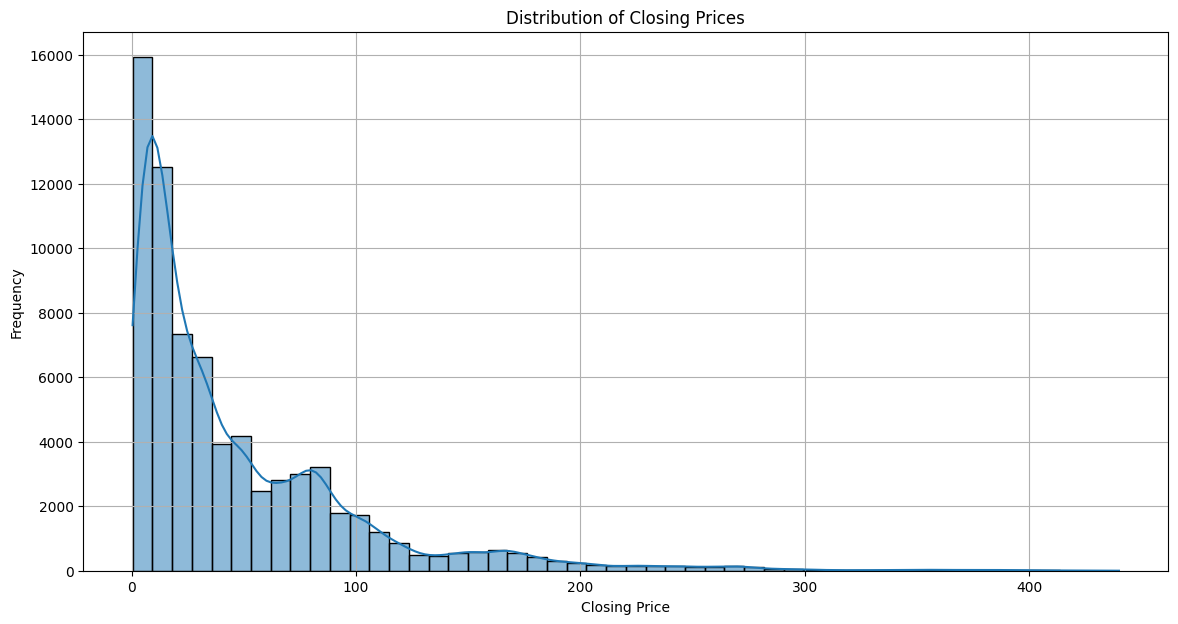

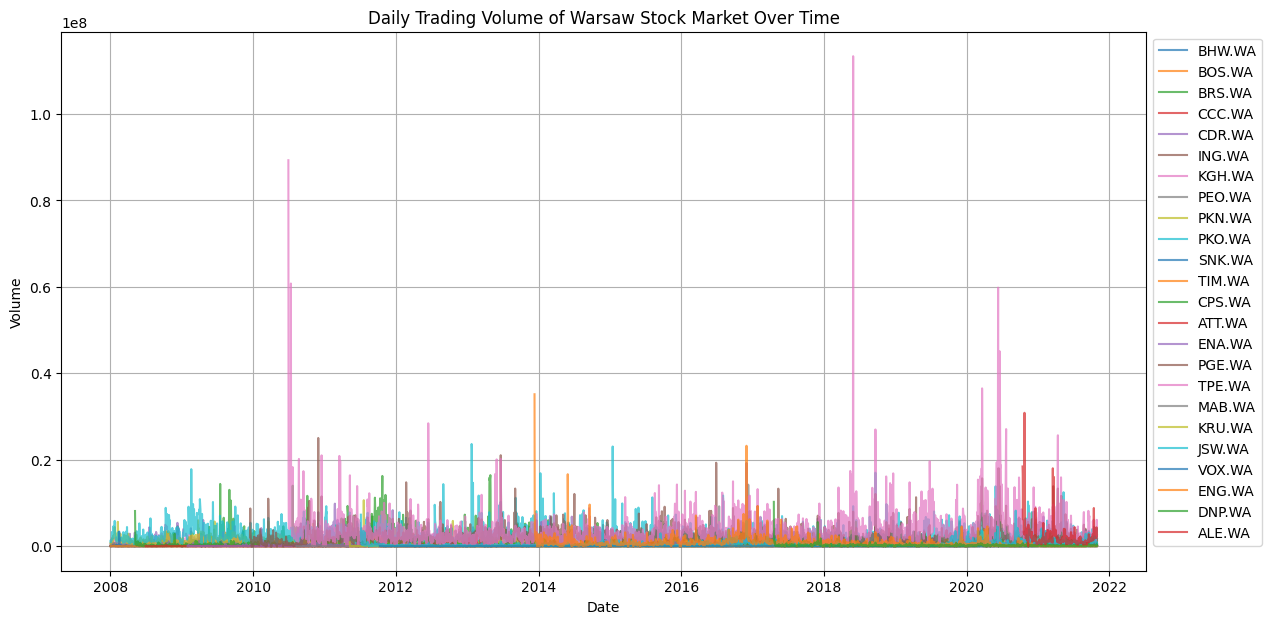

<ipython-input-8-7d779f61de75>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_warsaw['daily_return'] = stocks_data_warsaw.groupby('tic')['close'].pct_change()


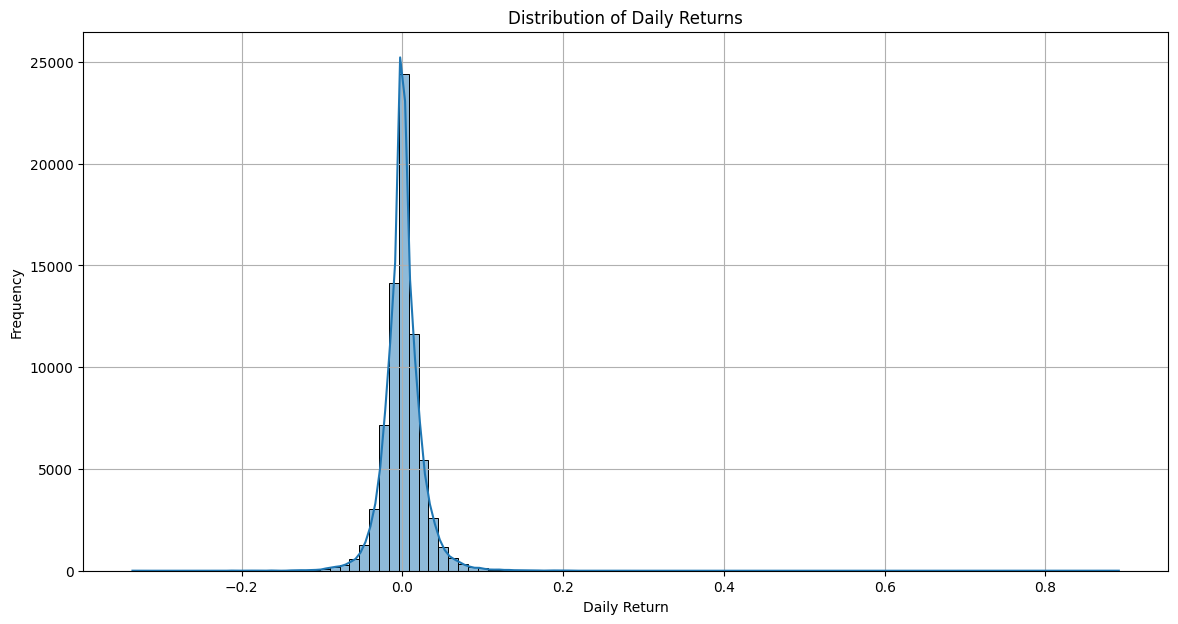

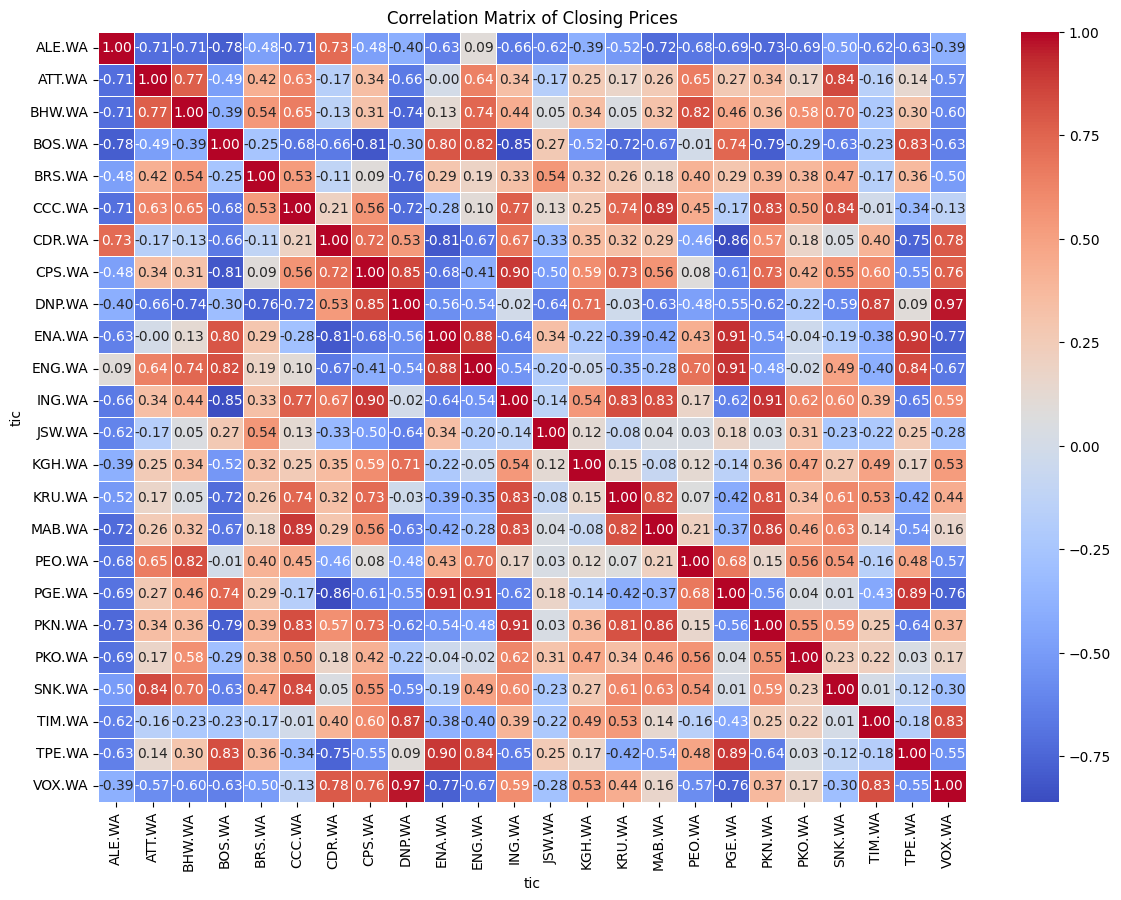

<ipython-input-8-7d779f61de75>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_warsaw['50_day_ma'] = stocks_data_warsaw.groupby('tic')['close'].transform(lambda x: x.rolling(window=50).mean())


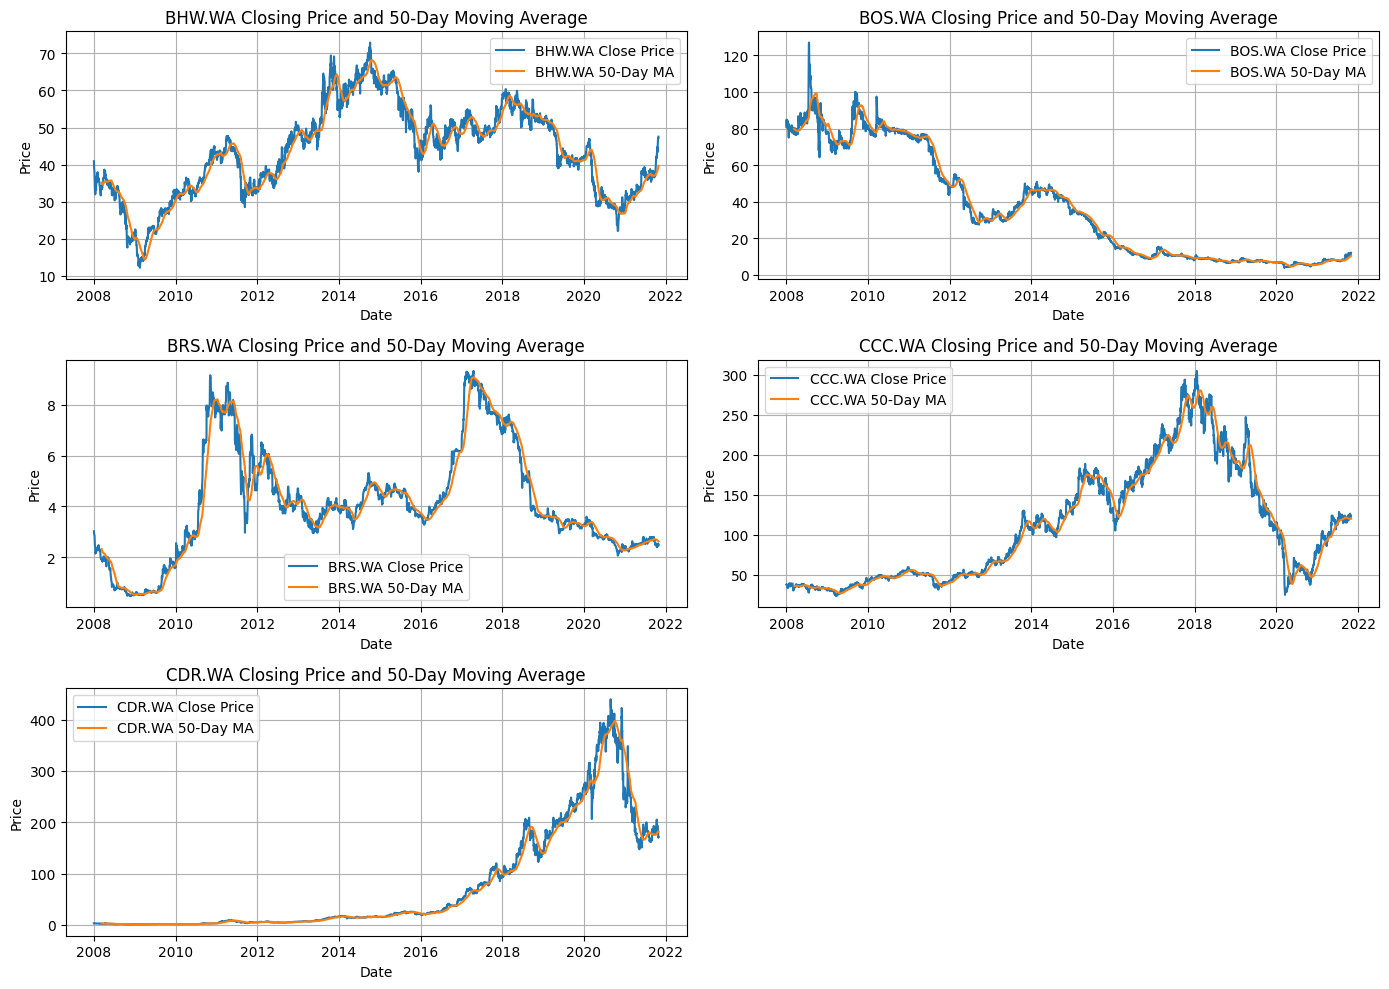

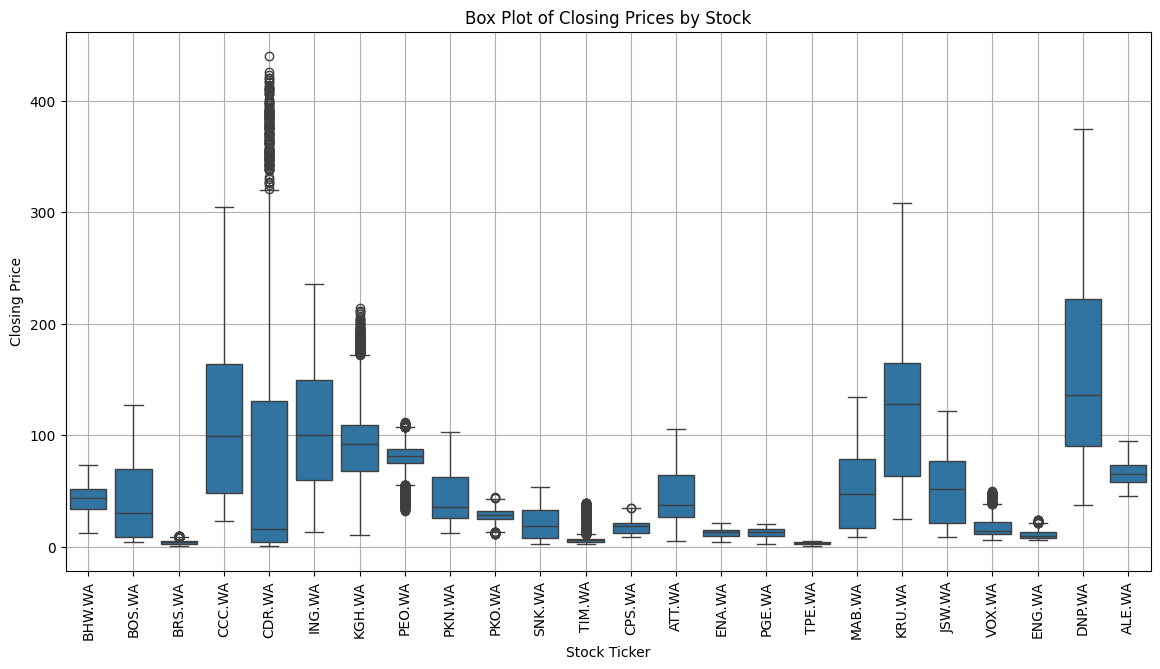

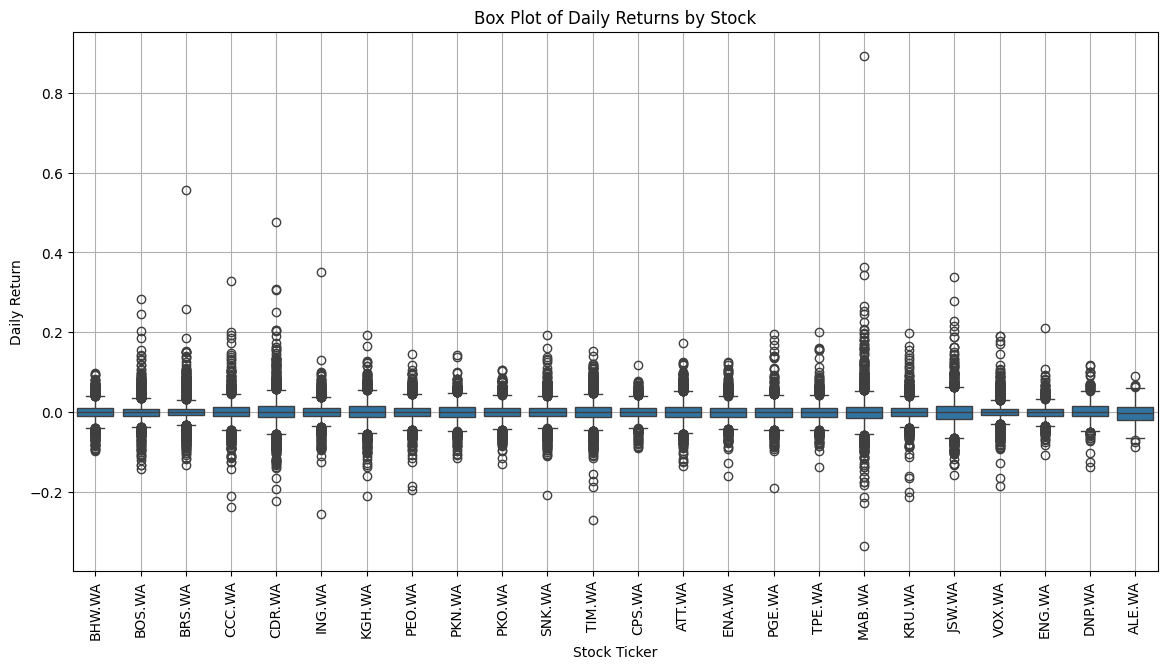

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure the directory exists
output_dir = '/content/drive/MyDrive/Colab Notebooks/Warsaw_eda'
os.makedirs(output_dir, exist_ok=True)

# Load the data
stocks_data_warsaw = df

# Remove LPP.WA from the dataset
stocks_data_warsaw = stocks_data_warsaw[stocks_data_warsaw['tic'] != 'LPP.WA']

# Extract the unique stock tickers again after removal
tickers_warsaw = stocks_data_warsaw['tic'].unique()

# Convert the 'date' column to datetime format
stocks_data_warsaw['date'] = pd.to_datetime(stocks_data_warsaw['date'])

# Display basic statistics of the dataset
basic_stats_warsaw = stocks_data_warsaw.describe(include='all')

# Save basic statistics to a CSV file
basic_stats_warsaw.to_csv(f'{output_dir}/basic_statistics_warsaw.csv', index=False)

# Plot the closing prices over time for all stocks
plt.figure(figsize=(14, 7))
for ticker in tickers_warsaw:
    plt.plot(stocks_data_warsaw[stocks_data_warsaw['tic'] == ticker]['date'],
             stocks_data_warsaw[stocks_data_warsaw['tic'] == ticker]['close'],
             label=ticker, alpha=0.7)
plt.title('Closing Prices of Warsaw Stock Market Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig(f'{output_dir}/closing_prices_over_time_warsaw.png')
plt.show()

# Plot the distribution of closing prices
plt.figure(figsize=(14, 7))
sns.histplot(stocks_data_warsaw['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(f'{output_dir}/distribution_closing_prices_warsaw.png')
plt.show()

# Plot the daily trading volume over time for all stocks
plt.figure(figsize=(14, 7))
for ticker in tickers_warsaw:
    plt.plot(stocks_data_warsaw[stocks_data_warsaw['tic'] == ticker]['date'],
             stocks_data_warsaw[stocks_data_warsaw['tic'] == ticker]['volume'],
             label=ticker, alpha=0.7)
plt.title('Daily Trading Volume of Warsaw Stock Market Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig(f'{output_dir}/daily_trading_volume_over_time_warsaw.png')
plt.show()

# Calculating the daily returns for each stock
stocks_data_warsaw['daily_return'] = stocks_data_warsaw.groupby('tic')['close'].pct_change()

# Summary statistics of daily returns
daily_return_stats_warsaw = stocks_data_warsaw['daily_return'].describe()

# Save daily return statistics to a CSV file
daily_return_stats_warsaw.to_csv(f'{output_dir}/daily_return_statistics_warsaw.csv')

# Plotting the daily return distribution
plt.figure(figsize=(14, 7))
sns.histplot(stocks_data_warsaw['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(f'{output_dir}/distribution_daily_returns_warsaw.png')
plt.show()

# Calculating the correlation matrix for closing prices of different stocks
closing_prices_warsaw = stocks_data_warsaw.pivot(index='date', columns='tic', values='close')

# Correlation matrix
corr_matrix_warsaw = closing_prices_warsaw.corr()

# Save correlation matrix to a CSV file
corr_matrix_warsaw.to_csv(f'{output_dir}/correlation_matrix_warsaw.csv')

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_warsaw, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Closing Prices')
plt.savefig(f'{output_dir}/correlation_matrix_closing_prices_warsaw.png')
plt.show()

# Calculating the moving average for a 50-day window
stocks_data_warsaw['50_day_ma'] = stocks_data_warsaw.groupby('tic')['close'].transform(lambda x: x.rolling(window=50).mean())

# Plotting the closing price and 50-day moving average for a few selected stocks
selected_tickers_warsaw = tickers_warsaw[:5]  # Select first 5 tickers for example

plt.figure(figsize=(14, 10))
for i, ticker in enumerate(selected_tickers_warsaw, 1):
    plt.subplot(3, 2, i)
    stock_data = stocks_data_warsaw[stocks_data_warsaw['tic'] == ticker]
    plt.plot(stock_data['date'], stock_data['close'], label=f'{ticker} Close Price')
    plt.plot(stock_data['date'], stock_data['50_day_ma'], label=f'{ticker} 50-Day MA')
    plt.title(f'{ticker} Closing Price and 50-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig(f'{output_dir}/closing_price_and_50_day_ma_warsaw.png')
plt.show()

# Box plots for closing prices of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(x='tic', y='close', data=stocks_data_warsaw)
plt.title('Box Plot of Closing Prices by Stock')
plt.xlabel('Stock Ticker')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig(f'{output_dir}/box_plot_closing_prices_warsaw.png')
plt.show()

# Box plots for daily returns of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(x='tic', y='daily_return', data=stocks_data_warsaw)
plt.title('Box Plot of Daily Returns by Stock')
plt.xlabel('Stock Ticker')
plt.ylabel('Daily Return')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig(f'{output_dir}/box_plot_daily_returns_warsaw.png')
plt.show()


In [ ]:
# Display basic statistics of the dataset
basic_stats_warsaw = stocks_data_warsaw.describe(include='all')
print("Basic Statistics:\n", basic_stats_warsaw)


Basic Statistics:
                                  date          open          high  \
count                           73505  73505.000000  73505.000000   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2015-06-18 13:44:33.858921216     57.894060     58.684009   
min               2008-01-02 00:00:00      0.593466      0.603248   
25%               2012-04-24 00:00:00     12.890000     13.000000   
50%               2015-08-03 00:00:00     35.020000     35.560001   
75%               2018-10-11 00:00:00     83.599998     84.699997   
max               2021-10-29 00:00:00    455.299988    464.200012   
std                               NaN     61.734640     62.607767   

                 low         close        volume     tic           day  \
count   73505.000000  73505.000000  7.350500e+04   73505  73505.000000   
uniq

In [ ]:
# Calculating the daily returns for each stock
stocks_data_warsaw['daily_return'] = stocks_data_warsaw.groupby('tic')['close'].pct_change()

# Summary statistics of daily returns
daily_return_stats_warsaw = stocks_data_warsaw['daily_return'].describe()
print("Daily Return Statistics:\n", daily_return_stats_warsaw)


Daily Return Statistics:
 count    73481.000000
mean         0.000522
std          0.025035
min         -0.335888
25%         -0.010989
50%          0.000000
75%          0.011035
max          0.891374
Name: daily_return, dtype: float64


<ipython-input-10-b9c08c50d396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_warsaw['daily_return'] = stocks_data_warsaw.groupby('tic')['close'].pct_change()


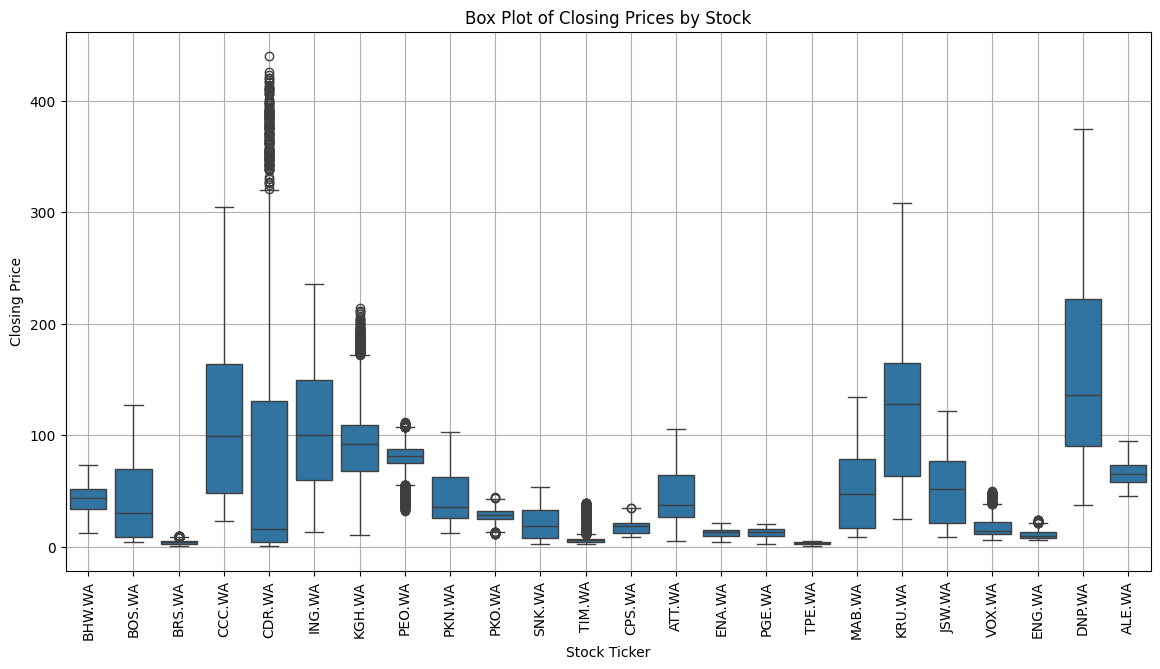

In [ ]:
# Box plots for closing prices of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(x='tic', y='close', data=stocks_data_warsaw)
plt.title('Box Plot of Closing Prices by Stock')
plt.xlabel('Stock Ticker')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig(f'{output_dir}/box_plot_closing_prices_warsaw.png')
plt.show()

In [ ]:
# Read the DataFrame from the CSV file in Google Drive
df_jp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data_jp.csv')
df_jp['date'] = pd.to_datetime(df_jp['date'])

# Verify the DataFrame
print(df_jp.head())

        date     open    high     low        close     volume     tic  day
0 2008-01-04  3390.00  3405.0  3175.0  1696.816528  451820000  2914.T    4
1 2008-01-04  1324.00  1346.0  1292.0   964.984497    9393500  4063.T    4
2 2008-01-04  6270.00  6350.0  6240.0  3217.266846    3385200  4502.T    4
3 2008-01-04   733.75   740.0   720.0   549.358582    4789600  4543.T    4
4 2008-01-04  2620.00  2645.0  2570.0  2037.189209    1148000  4911.T    4


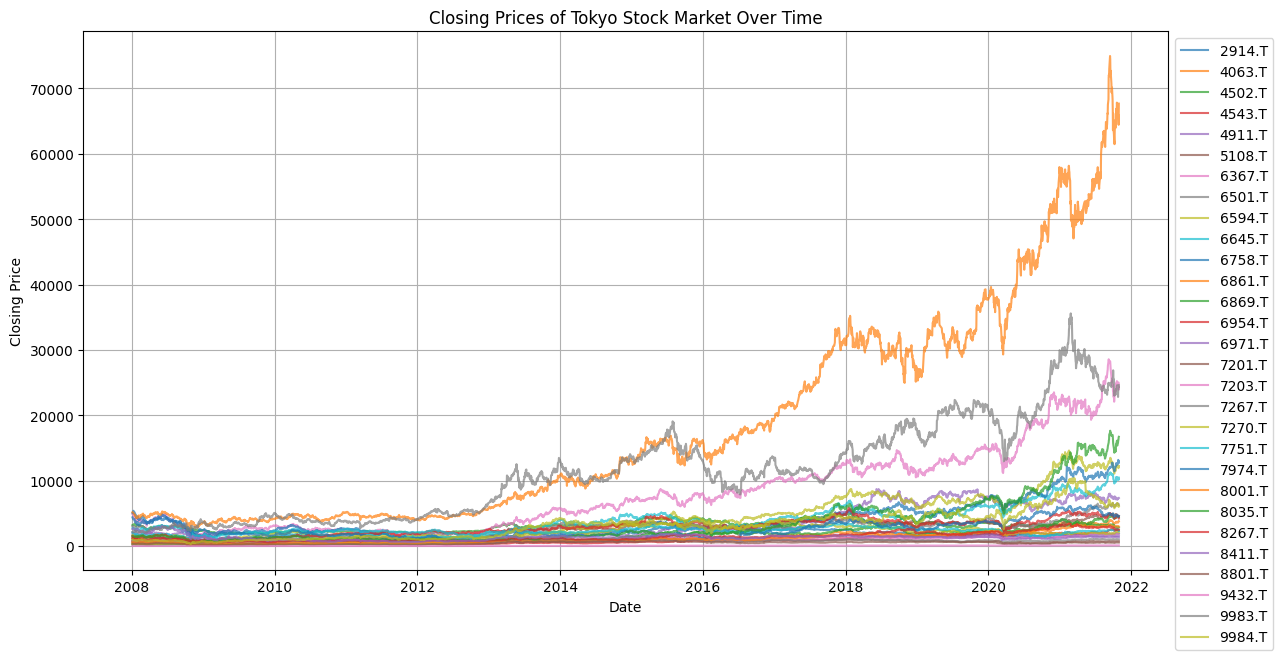

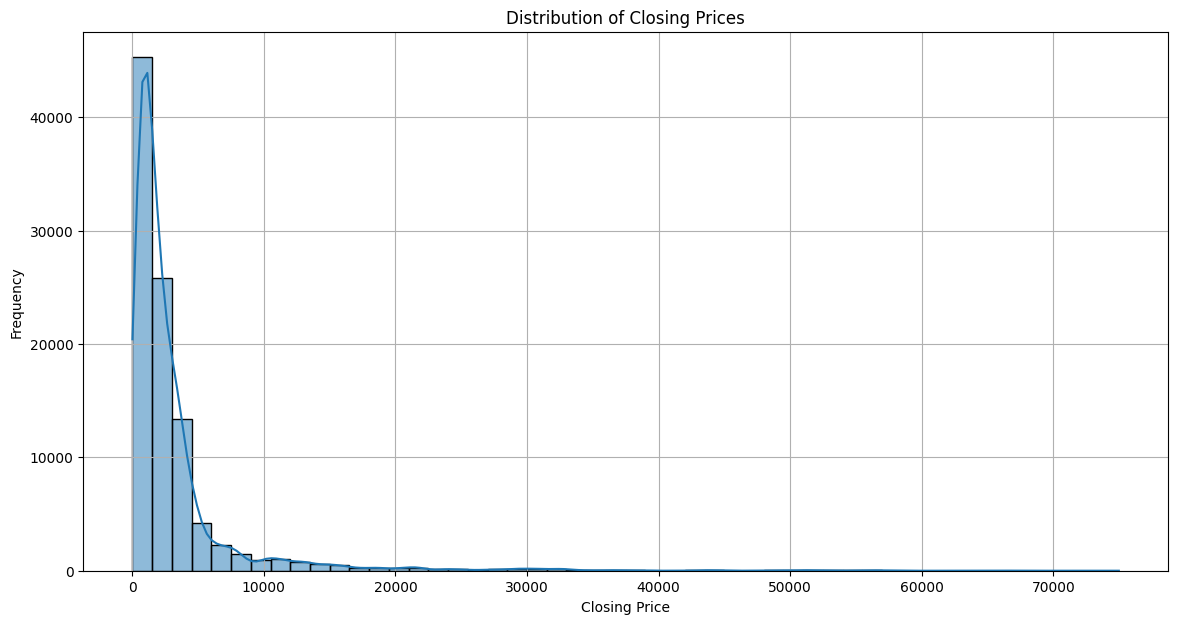

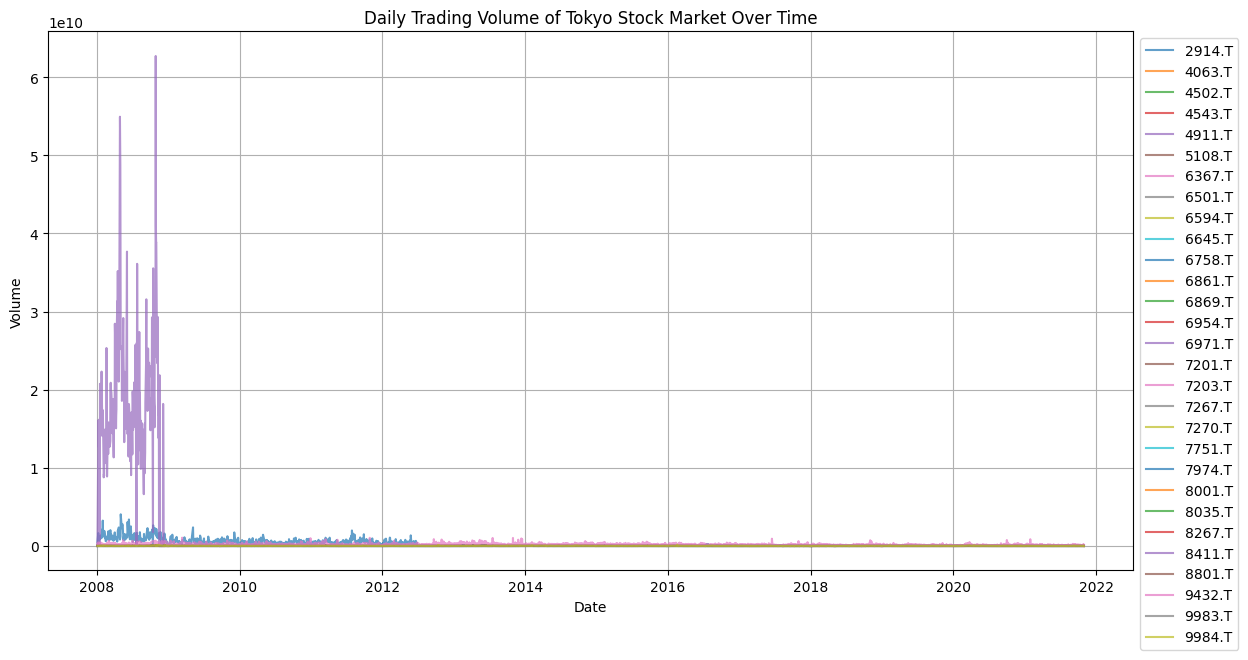

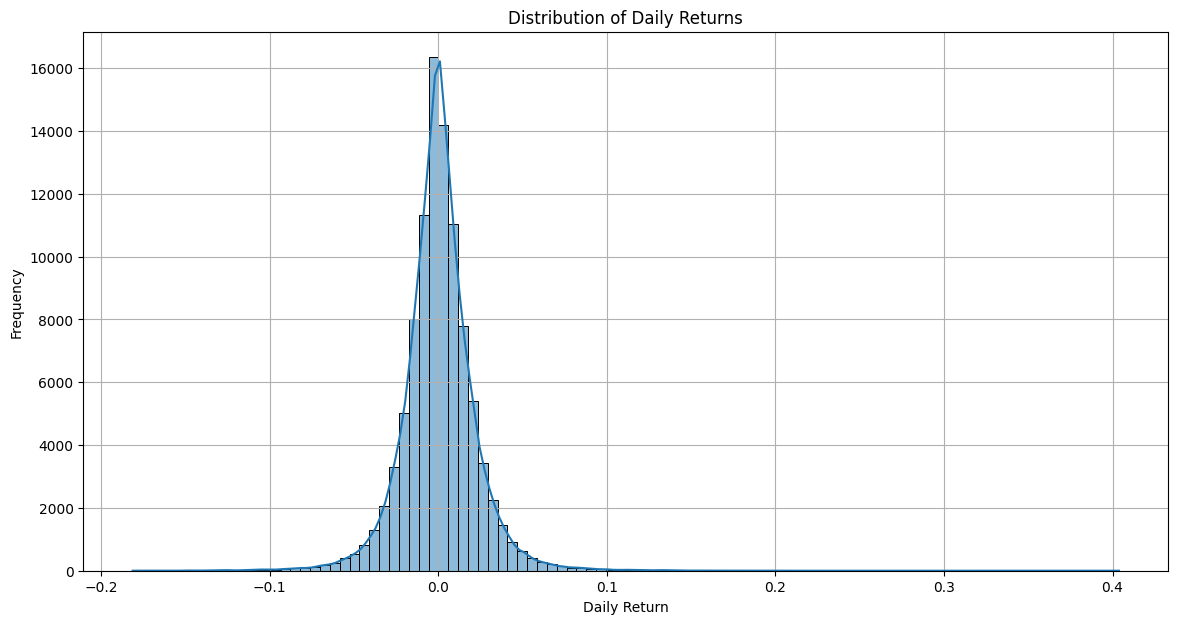

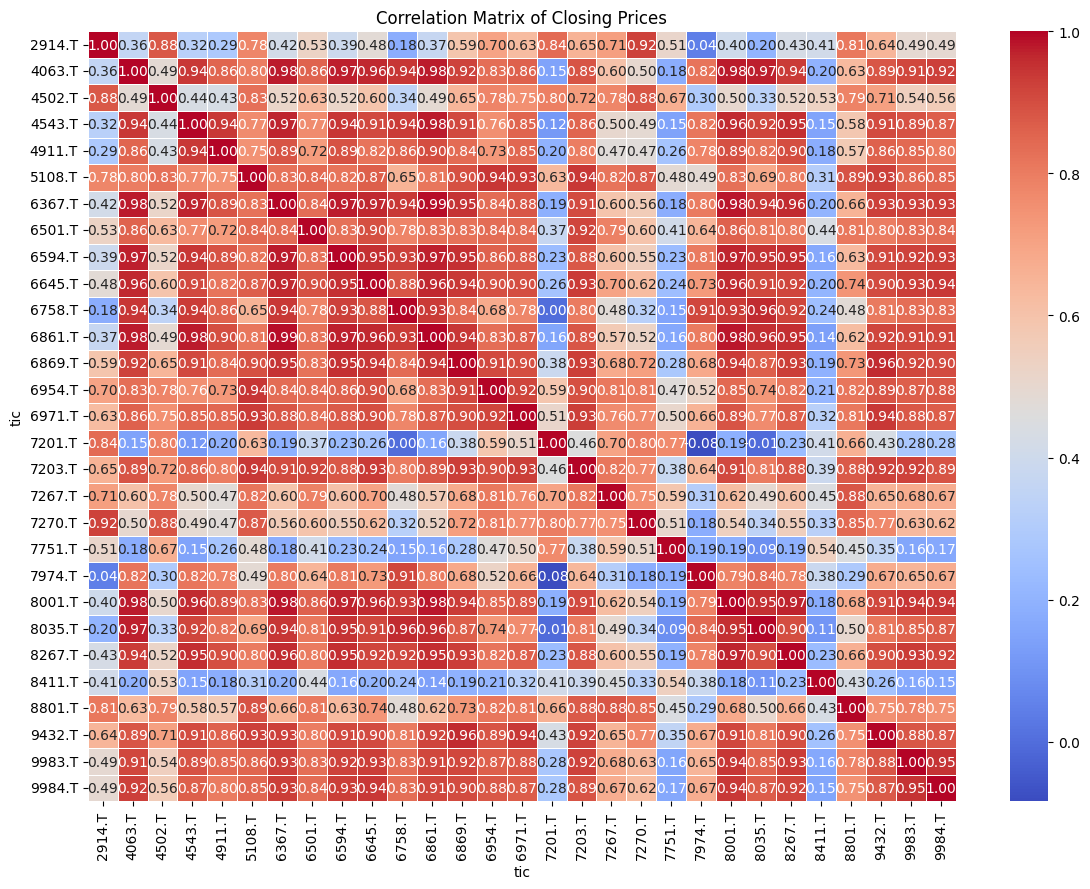

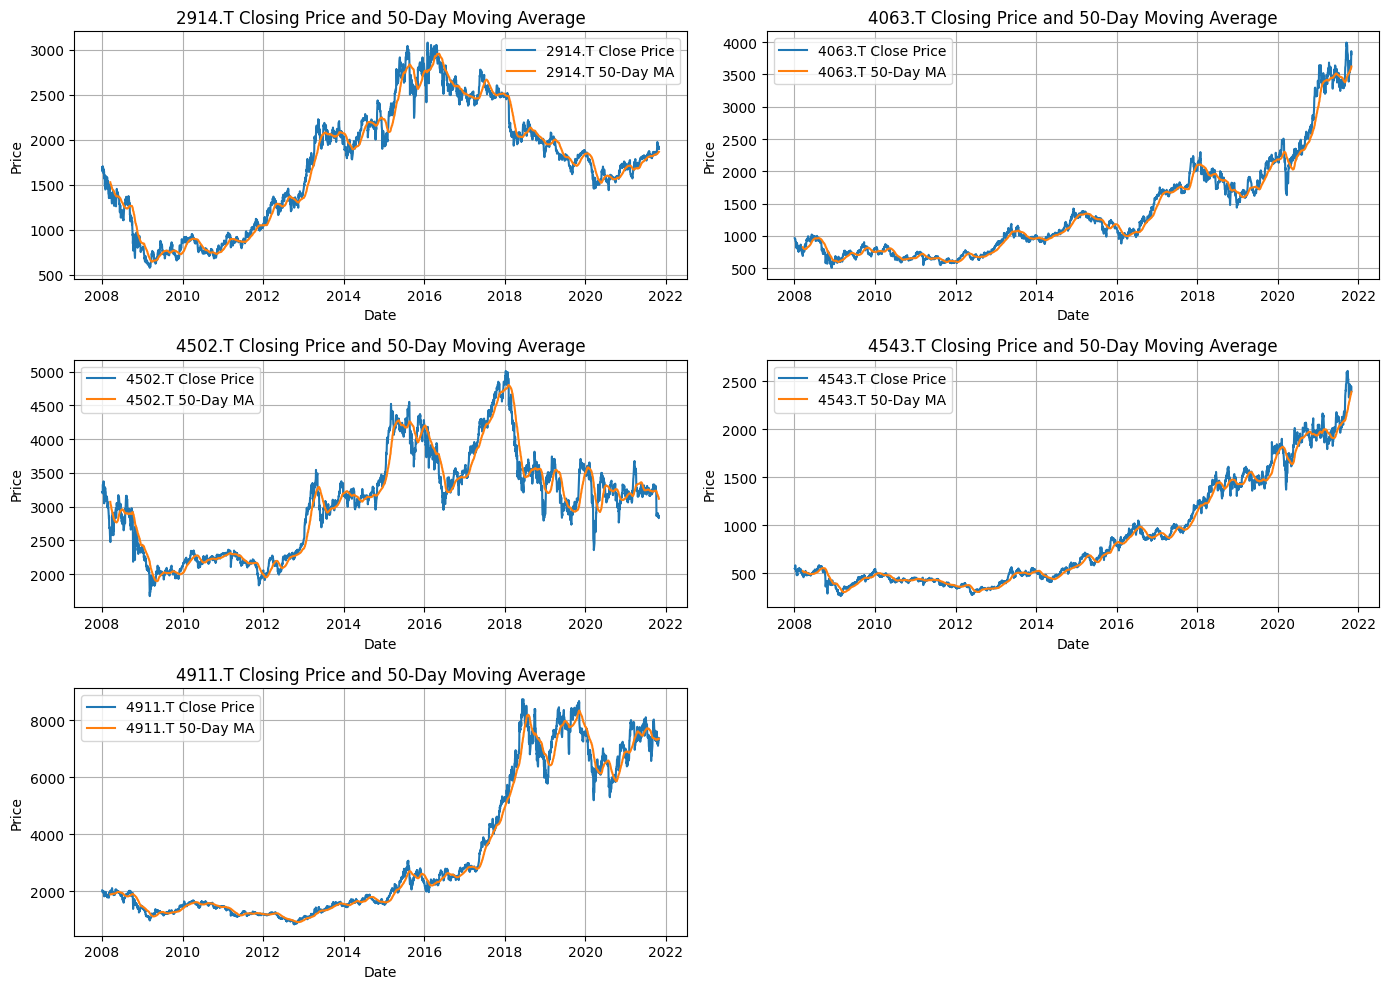

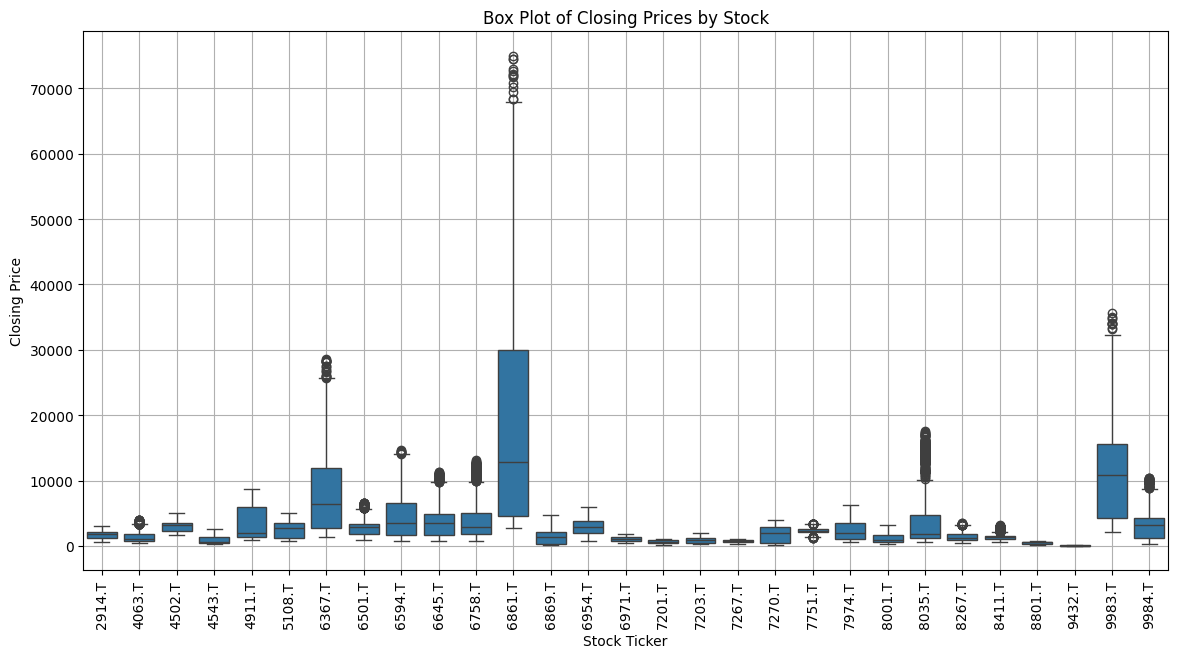

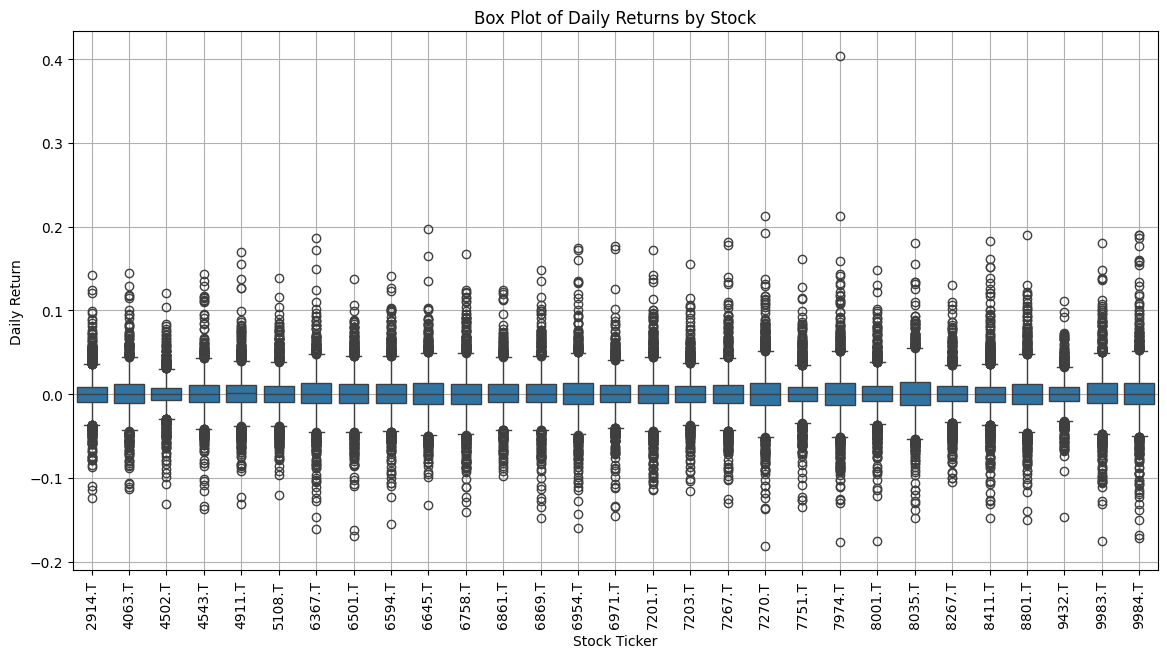

(                                 date          open          high  \
 count                           98658  98658.000000  98658.000000   
 unique                            NaN           NaN           NaN   
 top                               NaN           NaN           NaN   
 freq                              NaN           NaN           NaN   
 mean    2014-12-07 05:11:32.063492096   3550.186711   3585.267237   
 min               2008-01-04 00:00:00     32.950001     33.150002   
 25%               2011-06-29 00:00:00   1130.000000   1141.666626   
 50%               2014-12-11 12:00:00   2064.500000   2085.000000   
 75%               2018-05-15 00:00:00   3955.000000   3993.249939   
 max               2021-10-29 00:00:00  75450.000000  76210.000000   
 std                               NaN   5306.974726   5358.615896   
 
                  low         close        volume     tic           day  
 count   98658.000000  98658.000000  9.865800e+04   98658  98658.000000  
 unique   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
stocks_data_tokyo = df_jp

# Extract the unique stock tickers
tickers_tokyo = stocks_data_tokyo['tic'].unique()

# Convert the 'date' column to datetime format
stocks_data_tokyo['date'] = pd.to_datetime(stocks_data_tokyo['date'])

# Create directory to save plots if it doesn't exist
save_dir = '/content/drive/MyDrive/Colab Notebooks/Tokio_eda'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Display basic statistics of the dataset
basic_stats_tokyo = stocks_data_tokyo.describe(include='all')

# Save basic statistics to a CSV file
basic_stats_tokyo.to_csv(os.path.join(save_dir, 'basic_statistics_tokyo.csv'), index=False)

# Plot the closing prices over time for all stocks
plt.figure(figsize=(14, 7))
for ticker in tickers_tokyo:
    plt.plot(stocks_data_tokyo[stocks_data_tokyo['tic'] == ticker]['date'],
             stocks_data_tokyo[stocks_data_tokyo['tic'] == ticker]['close'],
             label=ticker, alpha=0.7)
plt.title('Closing Prices of Tokyo Stock Market Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'closing_prices_over_time_tokyo.png'))
plt.show()

# Plot the distribution of closing prices
plt.figure(figsize=(14, 7))
sns.histplot(stocks_data_tokyo['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'distribution_closing_prices_tokyo.png'))
plt.show()

# Plot the daily trading volume over time for all stocks
plt.figure(figsize=(14, 7))
for ticker in tickers_tokyo:
    plt.plot(stocks_data_tokyo[stocks_data_tokyo['tic'] == ticker]['date'],
             stocks_data_tokyo[stocks_data_tokyo['tic'] == ticker]['volume'],
             label=ticker, alpha=0.7)
plt.title('Daily Trading Volume of Tokyo Stock Market Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'daily_trading_volume_over_time_tokyo.png'))
plt.show()

# Calculating the daily returns for each stock
stocks_data_tokyo['daily_return'] = stocks_data_tokyo.groupby('tic')['close'].pct_change()

# Summary statistics of daily returns
daily_return_stats_tokyo = stocks_data_tokyo['daily_return'].describe()

# Save daily return statistics to a CSV file
daily_return_stats_tokyo.to_csv(os.path.join(save_dir, 'daily_return_statistics_tokyo.csv'))

# Plotting the daily return distribution
plt.figure(figsize=(14, 7))
sns.histplot(stocks_data_tokyo['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'distribution_daily_returns_tokyo.png'))
plt.show()

# Calculating the correlation matrix for closing prices of different stocks
closing_prices_tokyo = stocks_data_tokyo.pivot(index='date', columns='tic', values='close')

# Correlation matrix
corr_matrix_tokyo = closing_prices_tokyo.corr()

# Save correlation matrix to a CSV file
corr_matrix_tokyo.to_csv(os.path.join(save_dir, 'correlation_matrix_tokyo.csv'))

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_tokyo, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Closing Prices')
plt.savefig(os.path.join(save_dir, 'correlation_matrix_closing_prices_tokyo.png'))
plt.show()

# Calculating the moving average for a 50-day window
stocks_data_tokyo['50_day_ma'] = stocks_data_tokyo.groupby('tic')['close'].transform(lambda x: x.rolling(window=50).mean())

# Plotting the closing price and 50-day moving average for a few selected stocks
selected_tickers_tokyo = tickers_tokyo[:5]  # Select first 5 tickers for example

plt.figure(figsize=(14, 10))
for i, ticker in enumerate(selected_tickers_tokyo, 1):
    plt.subplot(3, 2, i)
    stock_data = stocks_data_tokyo[stocks_data_tokyo['tic'] == ticker]
    plt.plot(stock_data['date'], stock_data['close'], label=f'{ticker} Close Price')
    plt.plot(stock_data['date'], stock_data['50_day_ma'], label=f'{ticker} 50-Day MA')
    plt.title(f'{ticker} Closing Price and 50-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'closing_price_and_50_day_ma_tokyo.png'))
plt.show()

# Box plots for closing prices of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(x='tic', y='close', data=stocks_data_tokyo)
plt.title('Box Plot of Closing Prices by Stock')
plt.xlabel('Stock Ticker')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'box_plot_closing_prices_tokyo.png'))
plt.show()

# Box plots for daily returns of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(x='tic', y='daily_return', data=stocks_data_tokyo)
plt.title('Box Plot of Daily Returns by Stock')
plt.xlabel('Stock Ticker')
plt.ylabel('Daily Return')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig(os.path.join(save_dir, 'box_plot_daily_returns_tokyo.png'))
plt.show()

basic_stats_tokyo, daily_return_stats_tokyo


In [ ]:
# Calculating the daily returns for each stock
stocks_data_tokyo['daily_return'] = stocks_data_tokyo.groupby('tic')['close'].pct_change()

# Summary statistics of daily returns
daily_return_stats_tokyo = stocks_data_tokyo['daily_return'].describe()
print("Daily Return Statistics:\n", daily_return_stats_tokyo)


Daily Return Statistics:
 count    98629.000000
mean         0.000562
std          0.021668
min         -0.181250
25%         -0.010222
50%          0.000000
75%          0.011019
max          0.403811
Name: daily_return, dtype: float64
